In [113]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

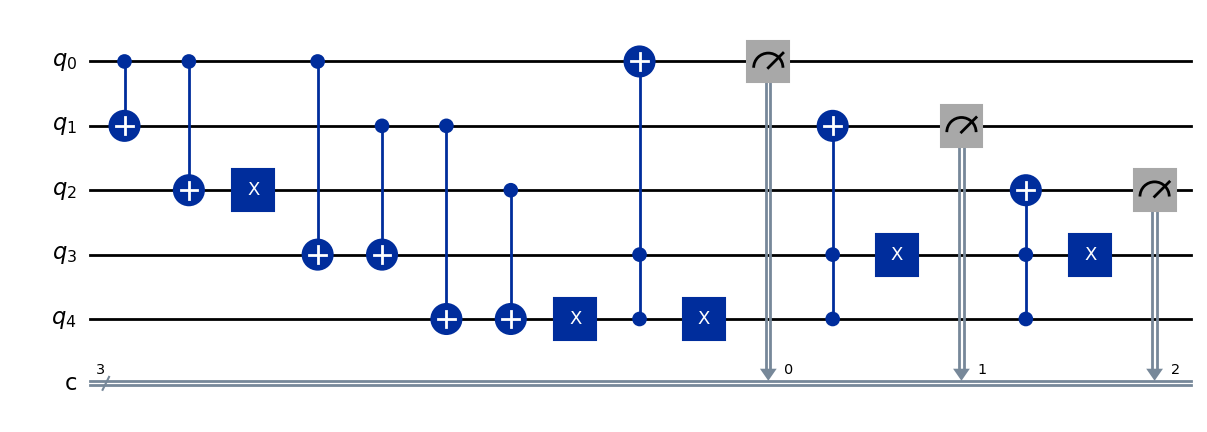

In [114]:
import random


bit_flip_err_detect = QuantumCircuit(5, 3)
bit_flip_err_detect.cx(0, 1)
bit_flip_err_detect.cx(0, 2)

place = random.randint(0, 2)
bit_flip_err_detect.x(place)

bit_flip_err_detect.cx(0, 3)
bit_flip_err_detect.cx(1, 3)
bit_flip_err_detect.cx(1, 4)
bit_flip_err_detect.cx(2, 4)

bit_flip_err_detect.x(4)
bit_flip_err_detect.ccx(3, 4, 0)
bit_flip_err_detect.x(4)

bit_flip_err_detect.ccx(3, 4, 1)

bit_flip_err_detect.x(3)
bit_flip_err_detect.ccx(3, 4, 2)
bit_flip_err_detect.x(3)

bit_flip_err_detect.measure([0, 1, 2], [0, 1, 2])

bit_flip_err_detect.draw("mpl")

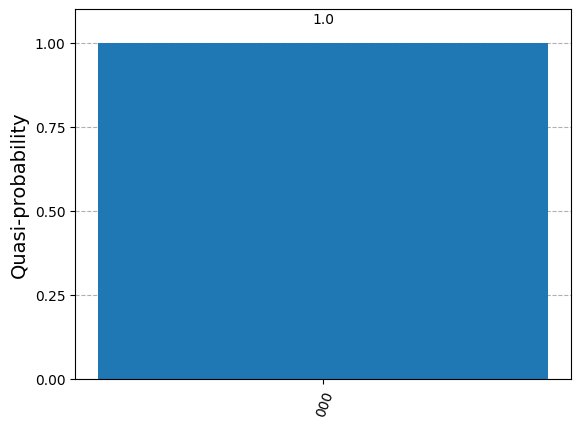

In [115]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
results = Sampler().run(bit_flip_err_detect, shot=1).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))